## Import Packages

In [1]:
print("Import Packages .. ")

import cv2
import glob
import pickle
import random
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split
# Visualizations will be shown in the notebook.
%matplotlib inline

print("All libraries imported.")

Import Packages .. 
All libraries imported.


## Step 0: Load The Data

In [2]:
print("Load pickled data .. ")
# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('X_train[features] =',X_train.shape)
print('y_train[labels]   =',y_train.shape)
print('X_test[features]  =',X_test.shape)
print('y_test[labels]    =',y_test.shape)

Load pickled data .. 
X_train[features] = (39209, 32, 32, 3)
y_train[labels]   = (39209,)
X_test[features]  = (12630, 32, 32, 3)
y_test[labels]    = (12630,)


In [3]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print('X_validation[features] =',X_validation.shape)
print('y_validation[labels]   =',y_validation.shape)

X_validation[features] = (7842, 32, 32, 3)
y_validation[labels]   = (7842,)


## Step 1: Dataset Summary & Exploration

In [4]:
# Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.concatenate((y_test,y_train), axis=0)
n_classes = np.concatenate((n_classes,y_validation),axis=0)
n_classes = np.unique(n_classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", len(n_classes))

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

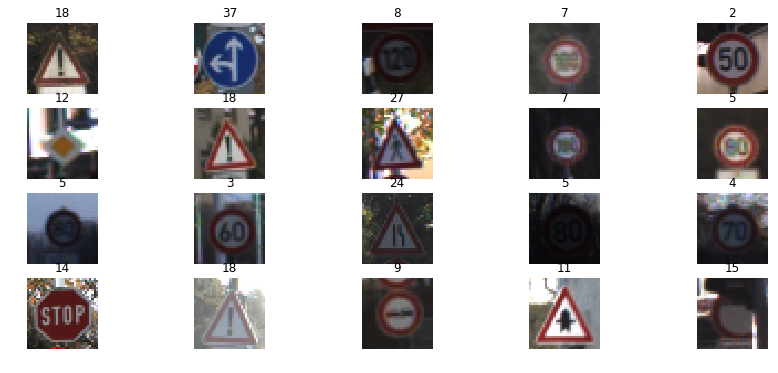

In [5]:
fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(0,20):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

### Pre-process the Data Set (normalization, grayscale, etc.)

RGB shape: (31367, 32, 32, 3)
Grayscale shape: (31367, 32, 32, 1)


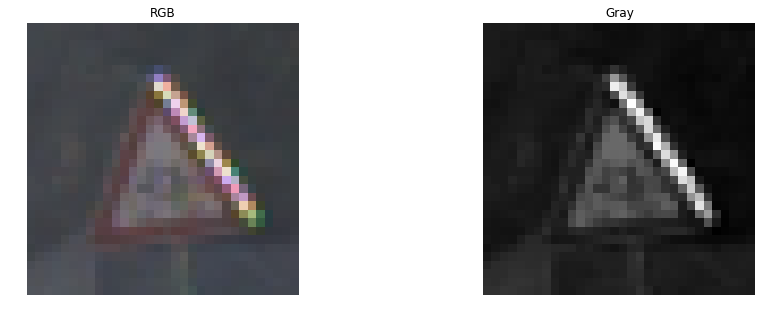

In [6]:
index = random.randint(0, len(X_train))
fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs = axs.ravel()

# CONVERT TO GRAYSCALE
X_test_RGB = X_test
X_train_RGB = X_train
X_validation_RGB = X_validation

X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

print('RGB shape:', X_train_RGB.shape)
print('Grayscale shape:', X_train_gray.shape)

axs[0].axis('off')
axs[0].set_title('RGB')
axs[0].imshow(X_train_RGB[index].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('Gray')
axs[1].imshow(X_train_gray[index].squeeze(), cmap='gray')

Original shape: (31367, 32, 32, 1)
Normalized shape: (31367, 32, 32, 1)


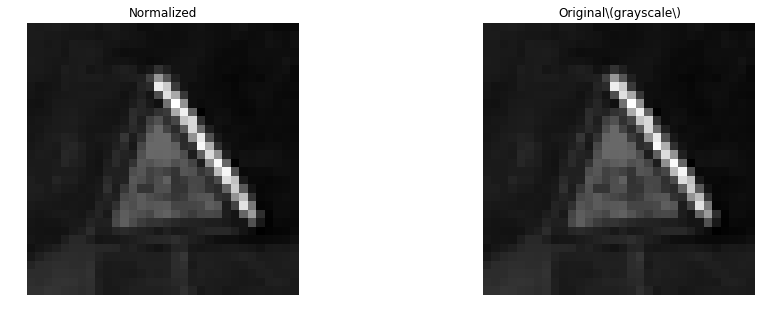

In [7]:
X_test = X_test_gray
X_train = X_train_gray
X_validation = X_validation_gray

# NORMALIZE
X_test_normalized = (X_test - 128)/128
X_train_normalized = (X_train - 128)/128 
X_validation_normalized = (X_validation - 128)/128 

print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)

fig, axs = plt.subplots(1,2, figsize=(15, 5))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Normalized')
axs[0].imshow(X_train_normalized[index].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('Original\(grayscale\)')
axs[1].imshow(X_train[index].squeeze(), cmap='gray')

In [8]:
X_test = X_test_normalized
X_train = X_train_normalized
X_validation = X_validation_normalized

### Model Architecture

![LeNet](https://github.com/jeremy-shannon/CarND-LeNet-Lab/raw/cd4ba97906176e6020a4b3c084b7518ef3dded5e/lenet.png)

In [9]:
def Letnet(x):
    #Hyperparameters   
    mu = 0
    sigma = 0.1
    
    #SOLUTION: Layer 1: Convolutional. INPUT= 32x32x1. OUTPUT= 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    #SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    #SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    #SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #SOLUTION: Dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)
    
    #SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, len(n_classes)), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(len(n_classes)))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, len(n_classes))

### Training Pipeline

In [11]:
rate = 0.001
EPOCHS = 55
BATCH_SIZE = 128

In [12]:
logits = Letnet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [14]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
X_train, y_train =shuffle(X_train,y_train)

### Train, Validate and Test the Model

Training...

EPOCH 1 ...
Validation Accuracy = 0.669

EPOCH 2 ...
Validation Accuracy = 0.853

EPOCH 3 ...
Validation Accuracy = 0.888

EPOCH 4 ...
Validation Accuracy = 0.921

EPOCH 5 ...
Validation Accuracy = 0.935

EPOCH 6 ...
Validation Accuracy = 0.954

EPOCH 7 ...
Validation Accuracy = 0.960

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.971

EPOCH 10 ...
Validation Accuracy = 0.973

EPOCH 11 ...
Validation Accuracy = 0.967

EPOCH 12 ...
Validation Accuracy = 0.974

EPOCH 13 ...
Validation Accuracy = 0.976

EPOCH 14 ...
Validation Accuracy = 0.979

EPOCH 15 ...
Validation Accuracy = 0.978

EPOCH 16 ...
Validation Accuracy = 0.979

EPOCH 17 ...
Validation Accuracy = 0.981

EPOCH 18 ...
Validation Accuracy = 0.980

EPOCH 19 ...
Validation Accuracy = 0.982

EPOCH 20 ...
Validation Accuracy = 0.984

EPOCH 21 ...
Validation Accuracy = 0.984

EPOCH 22 ...
Validation Accuracy = 0.985

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24 ...
Validation Accura

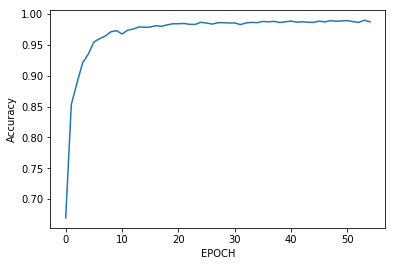

In [16]:
xs = []
ys = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        xs.append(i)
        ys.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(xs, ys)

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.925


## Step 3: Test a Model on New Images

### Load and Output the Images

In [18]:
Valid_images = [".jpg",".gif",".png",".tga"]

def Load_Images(Path_Directory):  #Load all images from the directory
    Img = []
    Images_in_Path = glob.glob('%s*.jpg' %Path_Directory)

    for idx, fname in enumerate(Images_in_Path):
        Img.append(cv2.imread(fname))

    return (Img)

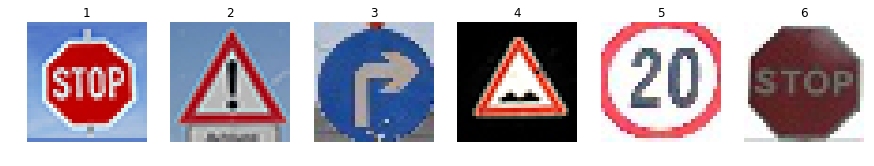

In [19]:
fig, axs = plt.subplots(1,6, figsize=(15, 4))
axs = axs.ravel()

imgs = Load_Images("./traffic-signs-data/German_Traffic_Signs/")

for i in range(0,len(imgs)):
    axs[i].set_title(i+1)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))

### Predict the Sign Type for Each Image

In [20]:
new_images = np.asarray(imgs)
print(new_images.shape)

nImagesProcessed = np.sum(new_images/3, axis = 3, keepdims = True)
nImagesNormalized = (nImagesProcessed - 128) / 128
print(nImagesNormalized.shape)

(6, 32, 32, 3)
(6, 32, 32, 1)


### Analyze Performance

In [21]:
labels = [14, 18, 33, 22, 0, 14]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    acc = evaluate(nImagesNormalized, labels)
    print("Test Set Accuracy = ",acc*100,"%")

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy =  66.6666686535 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./lenet


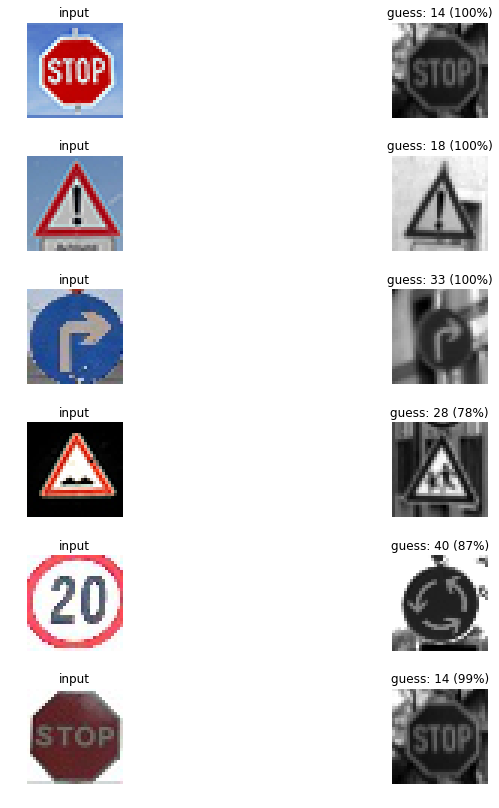

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: nImagesNormalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: nImagesNormalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(new_images),2, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(new_images):
        axs[2*i].axis('off')
        axs[2*i].imshow(cv2.cvtColor(new_images[i], cv2.COLOR_BGR2RGB))
        axs[2*i].set_title('input')
        
        guess = my_top_k[1][i][0]
        index = np.argwhere(y_validation == guess)[0]
        axs[2*i+1].axis('off')
        axs[2*i+1].imshow(X_validation[index].squeeze(), cmap='gray')
        axs[2*i+1].set_title('guess: {} ({:.0f}%)'.format(guess, 100*my_top_k[0][i][0]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.